In [1]:
def func1(input):
    return input + " from first function"

In [2]:
def func2(input):
    return input + " from second function"

In [3]:
def func3(input):
    return input + " from third function"

In [4]:
from langgraph.graph import Graph

In [5]:
workflow1 = Graph()

In [6]:
workflow1.add_node("func1", func1)

In [7]:
workflow1.add_node("func2", func2)

In [8]:
workflow1.add_node("func3", func3)

In [9]:
workflow1.add_edge("func1", "func2")
workflow1.add_edge("func2", "func3")

In [10]:
workflow1.set_entry_point("func1")

In [11]:
workflow1.set_finish_point("func3")

In [12]:
app = workflow1.compile()

In [13]:

app.get_graph()


Graph(nodes={'func1': Node(id='func1', name='func1', data=func1(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), 'func2': Node(id='func2', name='func2', data=func2(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), 'func3': Node(id='func3', name='func3', data=func3(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), '__start__': Node(id='__start__', name='__start__', data=None, metadata=None), '__end__': Node(id='__end__', name='__end__', data=None, metadata=None)}, edges=[Edge(source='__start__', target='func1', data=None, conditional=False), Edge(source='func1', target='func2', data=None, conditional=False), Edge(source='func2', target='func3', data=None, conditional=False), Edge(source='func3', target='__end__', data=None, conditional=False)])

In [14]:
from IPython.display import Image, display

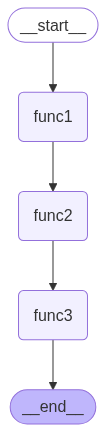

In [15]:

display(Image(app.get_graph().draw_mermaid_png()))

In [16]:

app.invoke("hi this is Raza")

'hi this is Raza from first function from second function from third function'

In [17]:
for output in app.stream("hi this is Raza"):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")
    

here is output from func1
_______
hi this is Raza from first function


here is output from func2
_______
hi this is Raza from first function from second function


here is output from func3
_______
hi this is Raza from first function from second function from third function




In [93]:
from dotenv import load_dotenv
load_dotenv()
import os

In [105]:
os.environ['GROQ_API_KEY']=os.getenv('GROQ_API_KEY')

In [107]:
from langchain_groq import ChatGroq

def llm(input):
    model=ChatGroq(model='gemma2-9b-it')
    output=model.invoke(input)
    return output.content

In [108]:

def token_counter(input):
    token=input.split()
    token_number=len(token)
    return f"total token number in the generated answer is {token_number}"

In [109]:
wf2 = Graph()

In [110]:
wf2.add_node("My_LLM", llm)
wf2.add_node("token_counter", token_counter)

In [111]:

wf2.add_edge("My_LLM","token_counter")

In [112]:

wf2.set_entry_point("My_LLM")

In [113]:

wf2.set_finish_point("token_counter")

In [114]:

app=wf2.compile()

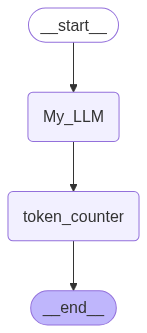

In [115]:

display(Image(app.get_graph().draw_mermaid_png()))

In [116]:

app.invoke("can you tell me about the Italy's capital?")

'total token number in the generated answer is 253'